In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv("spam.csv")

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5477,ham,What Today-sunday..sunday is holiday..so no wo...,NaN,NaN,NaN
2565,ham,I told her I had a Dr appt next week. She thin...,NaN,NaN,NaN
2745,ham,R �_ going 4 today's meeting?,NaN,NaN,NaN
4479,ham,Y cant u try new invention to fly..i'm not jok...,NaN,NaN,NaN
3957,ham,So i could kiss and feel you next to me...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
#1.Data Cleaning
#2.EDA
#3.TEXT PROCESSING
#4.MODEL BUILDING
#5.EVALUATION
#6.IMPROVEMENT
#7.WEBSITE
#8.DEPLOY

# 1.Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], inplace=True)

In [10]:
df.sample(5)

,v1,v2
2450,ham,K..give back my thanks.
1473,ham,"Will do, you gonna be at blake's all night? I ..."
5151,ham,No problem with the renewal. I.ll do it right ...
273,ham,"Usf I guess, might as well take 1 car"
1359,ham,&lt;#&gt; %of pple marry with their lovers... ...


In [11]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df.sample(5)

,target,text
443,ham,"Sorry, I'll call later"
3483,ham,Tell my bad character which u Dnt lik in me. ...
1576,ham,No. To be nosy I guess. Idk am I over reacting...
2541,ham,I dont. Can you send it to me. Plus how's mode.
642,ham,Probably gonna swing by in a wee bit


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [13]:
df['target']=encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
#check for duplicate values
df.duplicated().sum()

403

In [17]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

#  2.EDA

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

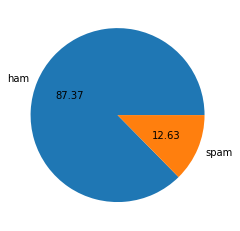

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [23]:
#data is imbalanced

In [24]:
!pip install nltk

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Pournima
[nltk_data]     Thakare\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df['num_characters']=df['text'].apply(len)

In [28]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.454246,1.948152
std,58.174846,13.325668,1.363792
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [34]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.120903,1.799601
std,56.356802,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [35]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.975498
std,30.014336,7.011513,1.487993
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [36]:
!pip install seaborn

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [37]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

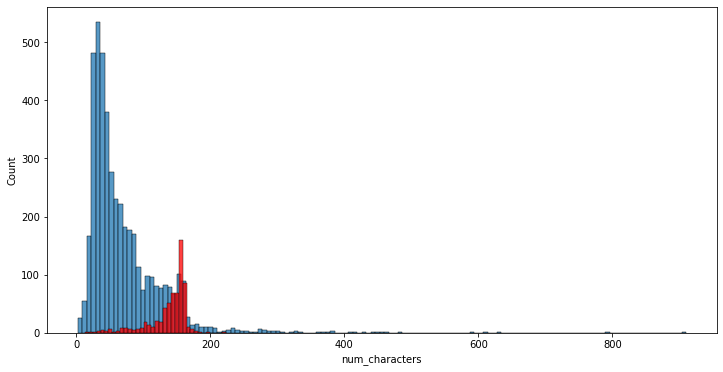

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

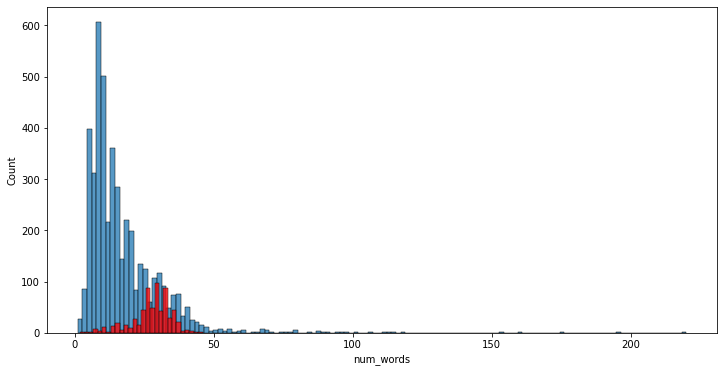

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

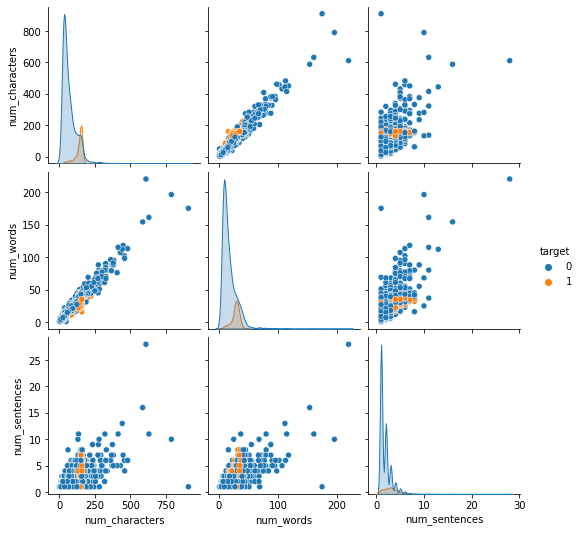

In [40]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

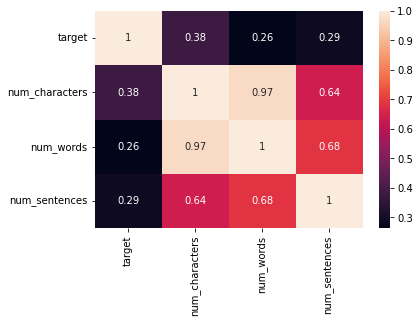

In [41]:
sns.heatmap(df.corr(),annot=True)

# 3.Data Preprocessing

1.Lower case                                                                   
2.Tokenization                                                                 
3.Removing special Characters                                                   
4.Removing stop words and punctuation                                           
5.stemming


In [42]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Pournima
[nltk_data]     Thakare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [44]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [45]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [46]:
df['transformed_text'] = df['text'].apply(transform_text)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
!pip install wordcloud

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [51]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [52]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

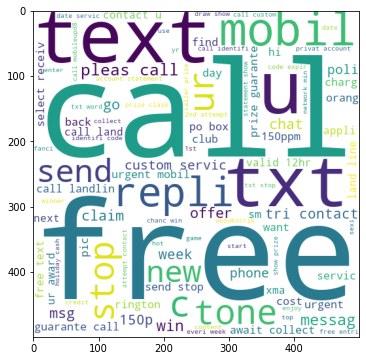

In [53]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [54]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

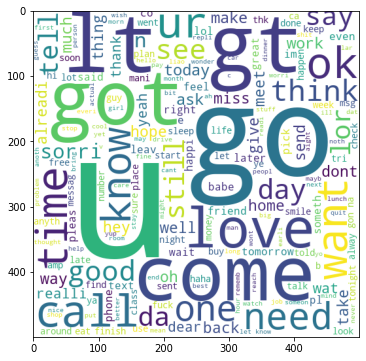

In [55]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [56]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [57]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [58]:
len(spam_corpus)

9941

In [66]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [67]:
len(ham_corpus)

35295

In [68]:
#text vectorization
#using bag of words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4.Model Building

In [70]:
!pip install sklearn

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [71]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [72]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [73]:
X.shape

(5169, 3000)

In [74]:
y=df['target'].values

In [75]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [78]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [80]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [88]:
gnb.fit(X_train, y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [89]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [90]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [91]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))